# Using APIs

* Pandas has an eco-system of APIs that allow you to get data from the web directly into a pandas dataframe


### FRED
* Here we will look at one API that gets macro and financial data from the Federal Reserve Bank of St louis

* Lots and lots of data!

  https://fred.stlouisfed.org/categories

* Right now our goal is just to get the lastest risk-free rate

* Which in this case is the yield on the three month treasury bill

  https://fred.stlouisfed.org/series/DTB3

* note that the fredapi is not in the anaconda eco-system so you install by openning anaconda Prompt 

* type "pip install fredapi"

* if it requires additional packages, install these packages to by tryping "pip install "name of required package"

* you will also need to apply for an API key here

  https://research.stlouisfed.org/docs/api/api_key.html

* once you have it you use it to do this:

In [100]:
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='f9207136b3333d7cf92c07273f6f5530')
data = fred.get_series('DTB3')


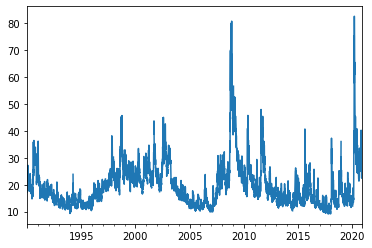

In [101]:
data = fred.get_series('VIXCLS')
data.plot()

In [102]:
data.tail()

2020-11-13    23.10
2020-11-16    22.45
2020-11-17    22.71
2020-11-18    23.84
2020-11-19    23.11
dtype: float64

**Google Trends**

<AxesSubplot:xlabel='date'>

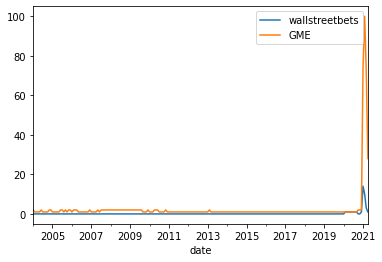

In [4]:
from pytrends.request import TrendReq
pytrend = TrendReq()
pytrend.build_payload(kw_list=['wallstreetbets','GME'],timeframe='all')
Googletrends=pytrend.interest_over_time()
Googletrends.plot()